### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [307]:
data = pd.read_csv('data/coupons.csv')

In [308]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [427]:
#check missing values in each column
print(data.isna().sum())



destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Coupon_Acceptance       0
new_coupon_group        0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [428]:
#checking datatypes before replacing/filling in missing values
data.info()
#Now filling the data with the most frquently used value for Attributes
data['car'] = data['car'].fillna(data['car'].value_counts().index[0])
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])
#Renaming Columns
data.rename(columns={'passanger': 'passenger' ,'Y': 'Coupon_Acceptance'}, inplace = True)
#Mapping Values to Attributes for ease of Analysis and Cleaning up of data
data = data.replace({'age': {'50plus': 50, 'below21': 20 } })
data['age'] = pd.to_numeric(data['age'])
income_mapping = {'income': {'Less than $12500': 12500, '$12500 - $24999': 24999, '$25000 - $37499': 37499, '$37500 - $49999': 49999, '$50000 - $62499': 62499, '$62500 - $74999': 74999 , '$75000 - $87499': 87499, '$87500 - $99999': 99999, '$100000 or More': 100000} }
data = data.replace(income_mapping)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int64 
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



Coupon Accepted Count and %:  7210 56.84 %
Coupon Rejected Count and %:  5474 43.16 %


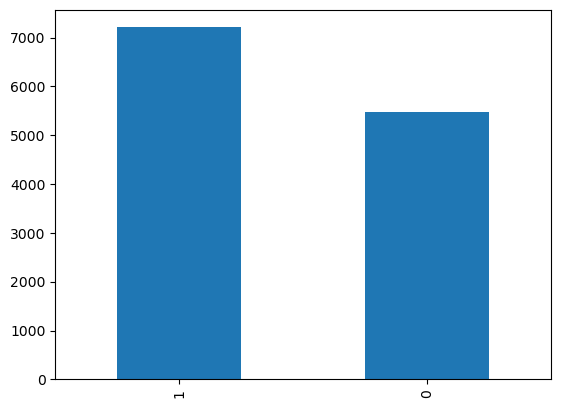

In [429]:
# Coupon Accepted/Rejected Count and %
data.Coupon_Acceptance.value_counts().plot(kind ='bar')
accept_count = (data['Coupon_Acceptance']==1).sum()
reject_count = (data['Coupon_Acceptance']==0).sum()
total_count = len(data)
accept_percentage = round((accept_count/total_count)*100,2)
reject_percentage = round((reject_count/total_count)*100,2)
print('Coupon Accepted Count and %: ', accept_count, accept_percentage,'%')
print('Coupon Rejected Count and %: ', reject_count, reject_percentage, '%')

# Observation : Overall Accepted Count and % is Higher than the Rejected metrics

5. Use a bar plot to visualize the `coupon` column.

**Visualizing the Overall Coupons Acceptance**

From this Bar plot we can clearly see that Coffee Coupon Was the Most offered and most coupons accepted were of Carry outs and Restaurants < 20 ones

1. Creating a Stacked Bar plot to see the Accepted & Rejected Counts by Coupons offered.



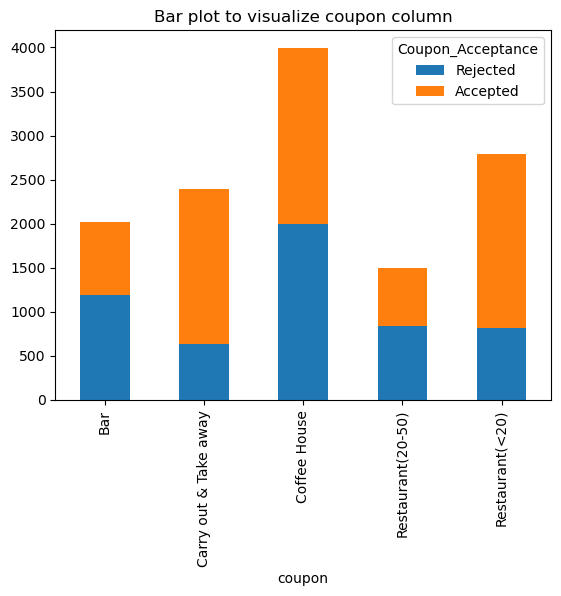

In [437]:
coupon_counts = data.groupby(['coupon', 'Coupon_Acceptance']).size().unstack(fill_value=0)
coupon_counts.plot(kind='bar', stacked=True, rot=90)
plt.xlabel ='Coupon'
plt.ylabel = 'Count'
plt.title('Bar plot to visualize coupon column')
plt.legend(title='Coupon_Acceptance', labels=['Rejected', 'Accepted'])


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature histogram')

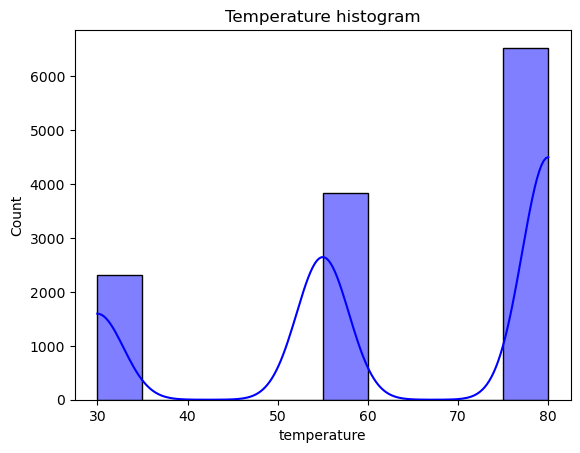

In [358]:
sns.histplot(data,x='temperature',bins =10, kde=True, color ='blue')
plt.title('Temperature histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [359]:
#Creating a data frame with Coupon - Bar
df_bar = data[data['coupon'] =='Bar']
df_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Acceptance,new_coupon_group
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,Bar
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,1,0,1,Bar
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,1,0,1,0,Bar
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,Bar
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,Bar


2. What proportion of bar coupons were accepted?


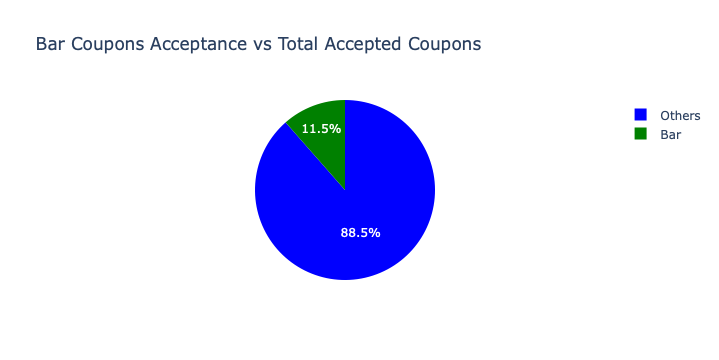

In [440]:
#Creating a pie plot to check the Bar Coupons Acceptance ratio vs Total Accepted Coupons
data.loc[data['coupon'] == 'Bar', 'new_coupon_group'] = 'Bar'
data.loc[data['coupon'] != 'Bar', 'new_coupon_group'] = 'Others'
fig1 = px.pie(data, values = 'Coupon_Acceptance', names = 'new_coupon_group',
              title = 'Bar Coupons Acceptance vs Total Accepted Coupons',color_discrete_sequence=['blue','green'])
fig1.show()



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


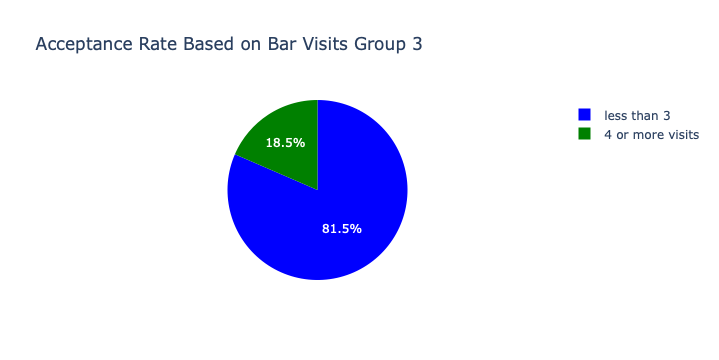

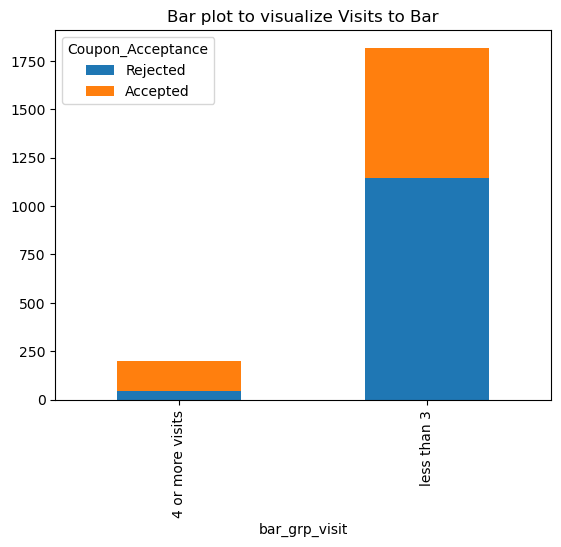

In [373]:
df_bar.loc[df_bar['Bar'] == 'never', 'bar_grp_visit'] = 'less than 3'
df_bar.loc[df_bar['Bar'] == 'less1', 'bar_grp_visit'] = 'less than 3'
df_bar.loc[df_bar['Bar'] == '1~3', 'bar_grp_visit'] = 'less than 3'
df_bar.loc[df_bar['Bar'] == '4~8', 'bar_grp_visit'] = '4 or more visits'
df_bar.loc[df_bar['Bar'] == 'gt8', 'bar_grp_visit'] = '4 or more visits'

df_bar.loc[df_bar['Bar'] == 'never', 'bar_grp_visit_count'] = 0
df_bar.loc[df_bar['Bar'] == 'less1', 'bar_grp_visit_count'] = 0
df_bar.loc[df_bar['Bar'] == '1~3', 'bar_grp_visit_count'] = 1
df_bar.loc[df_bar['Bar'] == '4~8', 'bar_grp_visit_count'] = 4
df_bar.loc[df_bar['Bar'] == 'gt8', 'bar_grp_visit_count'] = 9

total_group = df_bar.query('Coupon_Acceptance == 1')['Bar'].count()


df_bar.head()

query_condition_3_1 = 'Coupon_Acceptance == 1  & bar_grp_visit =="less than 3"'
group_3_1 = df_bar.query(query_condition_3_1)['Bar'].dropna().count()

query_condition_3_2 = 'Coupon_Acceptance == 1  & bar_grp_visit =="4 or more visits"'
group_3_2 = df_bar.query(query_condition_3_2)['Bar'].dropna().count()



# Create a DataFrame for the pie chart
d = {
    'category': ['less than 3', '4 or more visits'],
    'group': [group_3_1, group_3_2]
}
df_pie = pd.DataFrame(d)

## This plot shows the higher acceptance rate in Bar visits greater than 4 


fig3_1 = px.pie(df_pie, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Acceptance Rate Based on Bar Visits Group 3')
fig3_1.show()

# Creating a bar graph to show the Accepted and Rejected count

bar_coupon_counts = df_bar.groupby(['bar_grp_visit', 'Coupon_Acceptance']).size().unstack(fill_value=0)
bar_coupon_counts.plot(kind='bar', stacked=True, rot=90)
plt.xlabel ='Visits to Bar'
plt.ylabel = 'Count'
plt.title('Bar plot to visualize Visits to Bar')
plt.legend(title='Coupon_Acceptance', labels=['Rejected', 'Accepted'])








Observation from the Stacked bar graph clearly shows most of the Coupons are accepted from the Customers who visit less than 3 times to the Bar

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


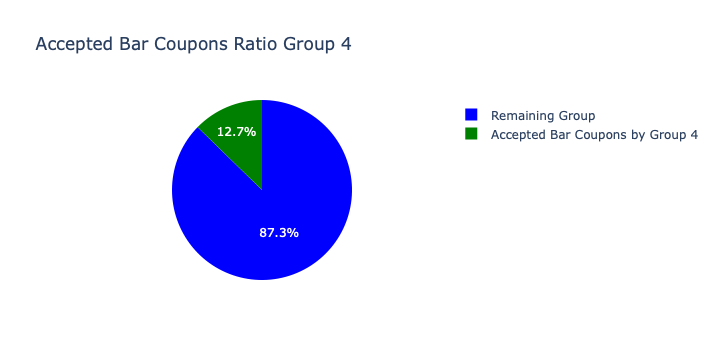

In [441]:

query_condition_4 = 'Coupon_Acceptance == 1 & age > 25 & bar_grp_visit_count > 1'
group_4 = df_bar.query(query_condition_4)['Bar'].dropna().count()

remaining_group_4 = total_group - group_4


# Create a DataFrame for the pie chart and plotting the acceptance ratio
d = {
    'category': ['Accepted Bar Coupons by Group 4', 'Remaining Group'],
    'group': [group_4, remaining_group_4]
}
df_pie = pd.DataFrame(d)

fig4_1 = px.pie(df_pie, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Accepted Bar Coupons Ratio Group 4')
fig4_1.show()




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


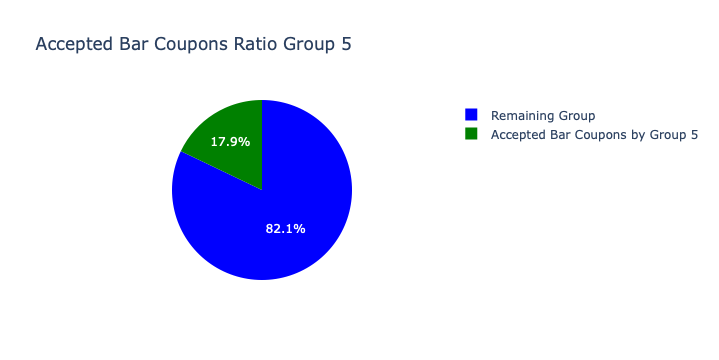

In [442]:

query_condition_5 = 'Coupon_Acceptance == 1  & bar_grp_visit_count > 1 & passenger != "Kid(s)" & occupation != "Farming Fishing & Forestry"'
total_group_5 = df_bar.query('Coupon_Acceptance == 1')['Bar'].count()
group_5 = df_bar.query(query_condition_5)['Bar'].dropna().count()

remaining_group_5 = total_group_5 - group_5


# Create a DataFrame for the pie chart and plotting the acceptance ratio

d = {
    'category': ['Accepted Bar Coupons by Group 5', 'Remaining Group'],
    'group': [group_5, remaining_group_5]
}
df_pie = pd.DataFrame(d)

fig5_1 = px.pie(df_pie, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Accepted Bar Coupons Ratio Group 5')
fig5_1.show()











6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



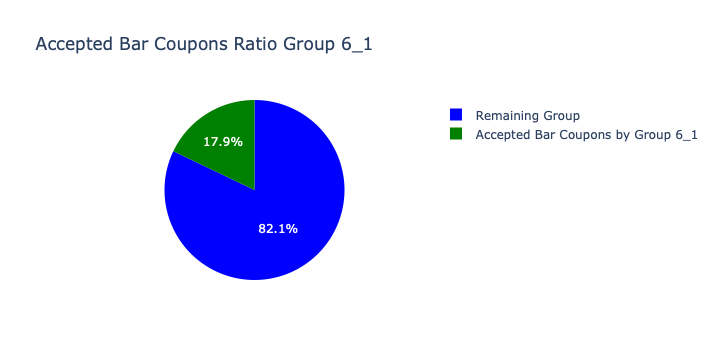

In [443]:

query_condition_6_1 = 'Coupon_Acceptance == 1  & bar_grp_visit_count > 1 & passenger != "Kid(s)" & maritalStatus != "Widowed"'
group_6_1 = df_bar.query(query_condition_6_1)['Bar'].dropna().count()
group_6_1_all = df_bar.query(query_condition_6_1)


remaining_group_6_1 = total_group - group_6_1

# Create a DataFrame for the pie chart and plotting the acceptance ratio

d_6_1 = {
    'category': ['Accepted Bar Coupons by Group 6_1', 'Remaining Group'],
    'group': [group_6_1, remaining_group_6_1]
}
df_pie_6_1 = pd.DataFrame(d_6_1)

fig6_1 = px.pie(df_pie_6_1, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Accepted Bar Coupons Ratio Group 6_1')
fig6_1.show()


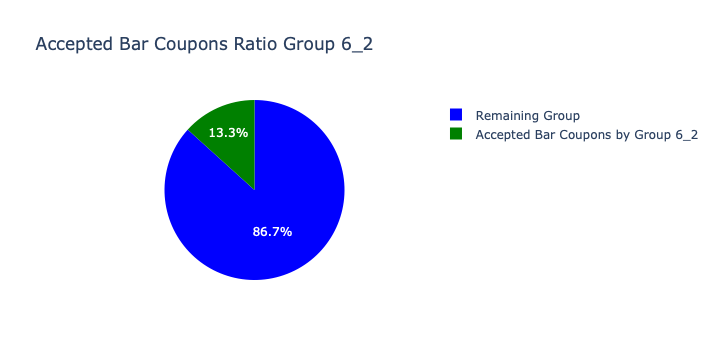

In [444]:

query_condition_6_2 = 'Coupon_Acceptance == 1  & bar_grp_visit_count > 1 & age <30'
group_6_2 = df_bar.query(query_condition_6_2)['Bar'].dropna().count()
group_6_2_all = df_bar.query(query_condition_6_2)


remaining_group_6_2 = total_group - group_6_2

# Create a DataFrame for the pie chart and plotting the acceptance ratio

d_6_2 = {
    'category': ['Accepted Bar Coupons by Group 6_2', 'Remaining Group'],
    'group': [group_6_2, remaining_group_6_2]
}
df_pie_6_2 = pd.DataFrame(d_6_2)

fig6_2 = px.pie(df_pie_6_2, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Accepted Bar Coupons Ratio Group 6_2')
fig6_2.show()


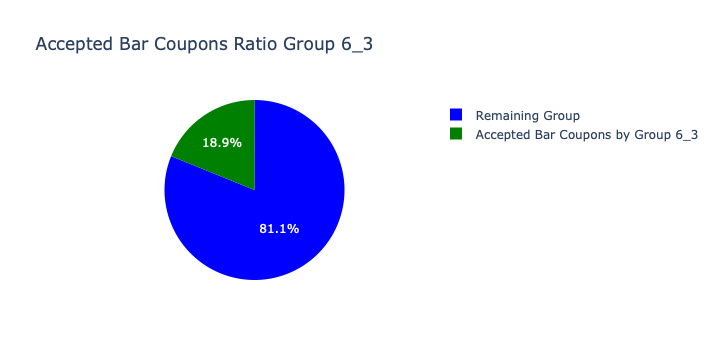

In [445]:
df_bar.loc[df_bar['RestaurantLessThan20'] == 'never', 'RestaurantLessThan20_count'] = 0
df_bar.loc[df_bar['RestaurantLessThan20'] == 'less1', 'RestaurantLessThan20_count'] = 1
df_bar.loc[df_bar['RestaurantLessThan20'] == '1~3', 'RestaurantLessThan20_count'] = 2
df_bar.loc[df_bar['RestaurantLessThan20'] == '4~8', 'RestaurantLessThan20_count'] = 6
df_bar.loc[df_bar['RestaurantLessThan20'] == 'gt8', 'RestaurantLessThan20_count'] = 9




query_condition_6_3 = 'Coupon_Acceptance == 1  & RestaurantLessThan20_count > 4 & income < 50_000'
group_6_3 = df_bar.query(query_condition_6_3)['Bar'].dropna().count()
group_6_3_all = df_bar.query(query_condition_6_3)


remaining_group_6_3 = total_group - group_6_3

# Create a DataFrame for the pie chart and plotting the acceptance ratio

d_6_3 = {
    'category': ['Accepted Bar Coupons by Group 6_3', 'Remaining Group'],
    'group': [group_6_3, remaining_group_6_3]
}
df_pie_6_3 = pd.DataFrame(d_6_3)

fig6_3 = px.pie(df_pie_6_3, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Accepted Bar Coupons Ratio Group 6_3')
fig6_3.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

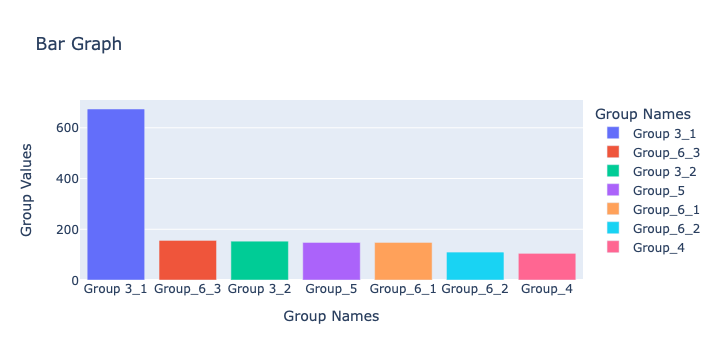

In [385]:
#Creating a bar graph to understand the group that has accepted higher number of coupons, doing this by creating a data frame
group_names = ['Group 3_1','Group 3_2', 'Group_4','Group_5','Group_6_1','Group_6_2','Group_6_3']
group_values = [group_3_1,group_3_2,group_4,group_5,group_6_1,group_6_2,group_6_3]

df_bar_graph = pd.DataFrame({'Group Names':group_names,'Group Values': group_values })
df_bar_graph = df_bar_graph.sort_values(by='Group Values', ascending = False)




fig7 = px.bar(df_bar_graph,x='Group Names', y='Group Values', color='Group Names',
             title='Bar Graph')
fig7.show()

Observation - From the Bar graph above we can see the Group 3_1 which had customers visit the Bar less than 3 times performed well in accepting the coupons, probably they wait for coupons or discounts for their trips to Bar.  Also Group age between 25 and 30 were performing less in accepting the coupons we can reduce the frequency in sending the coupons to that age group.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [386]:
#Choosing Coffee coupon and creating a dataframe to do additional analysis since coffee coupon had overall highest coupon acceptance rate 
df_coffee = data[data['coupon'] =='Coffee House']
df_coffee.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Acceptance,new_coupon_group
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,Others
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,Others
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,Others
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,Others
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,Others


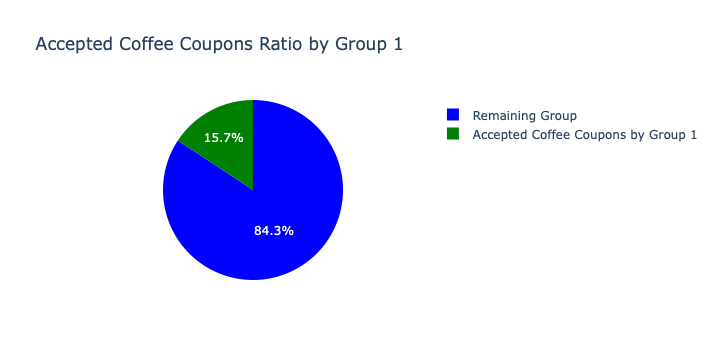

In [390]:
#Coffee Coupon accepted vs others
group_coffee_1 = (df_coffee[df_coffee['Coupon_Acceptance'] == 1]['Coupon_Acceptance'].count()/len(data))
remaining_group_1 = 1-group_coffee_1

# Create a DataFrame for the pie chart
d_coffee_1 = {
    'category': ['Accepted Coffee Coupons by Group 1', 'Remaining Group'],
    'group': [group_coffee_1, remaining_group_1]
}
df_pie_coffee_1 = pd.DataFrame(d_coffee_1)

fig8_1 = px.pie(df_pie_coffee_1, names='category', values='group',color_discrete_sequence=['blue','green'],
              title='Accepted Coffee Coupons Ratio by Group 1')
fig8_1.show()


Analysis - Coffee Coupon Acceptance by Marital Status and Gender: Shows Single Male have a higher acceptance on Coffee coupon than the rest of Marital Status

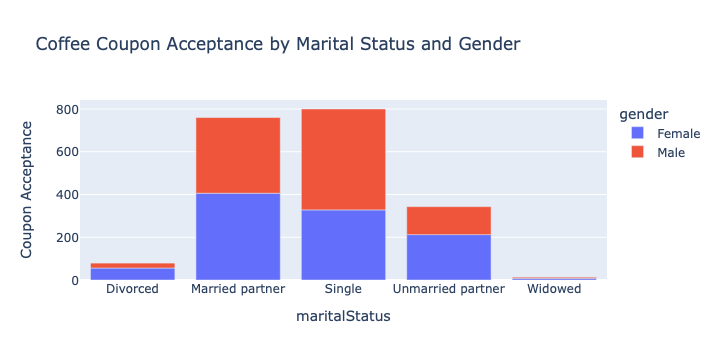

In [416]:
#Creating a stacked bar plot to show the Coupon acceptance, this is done by using group by function amd sum
sum1=df_coffee.groupby(['maritalStatus', 'gender'])['Coupon_Acceptance'].sum().reset_index()
fig8 = px.bar(sum1, x='maritalStatus', y='Coupon_Acceptance', color='gender',
             title='Coffee Coupon Acceptance by Marital Status and Gender',
             labels={'Coupon_Acceptance': 'Coupon Acceptance'})
fig8.show()

Analysis and observation - From plotting Coffee Coupon accepted by passenger type - we could tell most of the coupons are Accepted by Customer who are driving Alone, the next highest being when traveling with Friends.  Next steps we can also see if the Customers who visit less than 3 times have lower acceptance rate then we can reduce sending the coupons to those customers



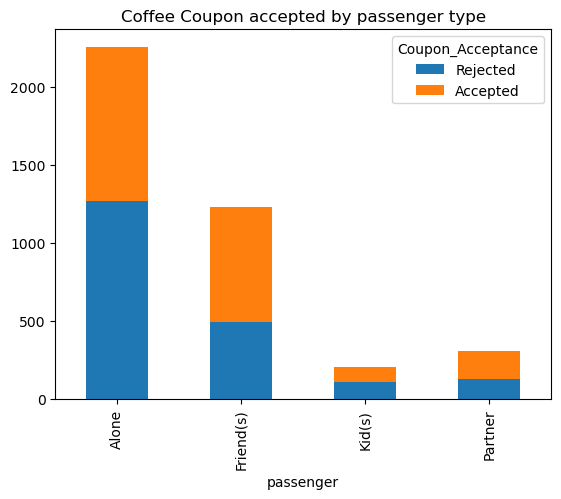

In [426]:
#Coffee Coupon accepted by passenger type

coffee_coupon_counts = df_coffee.groupby(['passenger', 'Coupon_Acceptance']).size().unstack(fill_value=0)
coffee_coupon_counts.plot(kind='bar', stacked=True, rot=90)
plt.xlabel ='Passenger Type'
plt.ylabel = 'Count'
plt.title('Coffee Coupon accepted by passenger type')
plt.legend(title='Coupon_Acceptance', labels=['Rejected', 'Accepted'])



Next steps we can also see do more analysis if the Customers who visit less than 3 times have lower acceptance rate and other factors.  Our intention is finding the groups which we can reduce/increase in sending the coupons to those customers based on their behavior and attributes avaialble in the dataset.